In [1]:
import os
import numpy as np
import mne
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
resample_freq = 200

# Load the data

In [3]:
sample_data_path = os.path.join(os.getcwd(), 'data', 'Concert_EEG.csv')
df = pd.read_csv(sample_data_path)
df

Time      E1      E2      E3      E4      E5      E6  \
0.0       0.0       -2541.1 -6378.5 -8112.9 -6691.8 -2152.4 -5259.2  598.40   
1.0       1.0       -2574.3 -6407.1 -8149.1 -6735.0 -2193.0 -5207.1  562.03   
2.0       2.0       -2596.9 -6427.1 -8166.9 -6758.7 -2217.4 -5198.4  539.53   
3.0       3.0       -2563.3 -6380.8 -8115.5 -6723.3 -2178.0 -5265.4  583.60   
4.0       4.0       -2511.1 -6321.3 -8055.6 -6667.9 -2120.0 -5353.4  644.01   
...                     ...     ...     ...     ...     ...     ...     ...   
1431200.0 1431200.0     0.0     0.0     0.0     0.0     0.0     0.0    0.00   
          1431200.0     0.0     0.0     0.0     0.0     0.0     0.0    0.00   
          1431200.0     0.0     0.0     0.0     0.0     0.0     0.0    0.00   
          1431200.0     0.0     0.0     0.0     0.0     0.0     0.0    0.00   
          1431200.0     0.0     0.0     0.0     0.0     0.0     0.0    0.00   

                        E7      E8     E9  ...    E121    E122    E123  \
0.0       0.0       -17129 -7532.3 -19525  ... -4202.7 -3087.9 -6484.6   
1.0       1.0       -17133 -7566.5 -19488  ... -4243.7 -3124.9 -6524.9   
2.0       2.0       -17177 -7585.1 -19501  ... -4269.0 -3150.6 -6552.6   
3.0       3.0       -17282 -7537.9 -19575  ... -4243.2 -3118.1 -6518.6   
4.0       4.0       -17394 -7479.9 -19684  ... -4193.7 -3062.7 -6464.1   
...                    ...     ...    ...  ...     ...     ...     ...   
1431200.0 1431200.0      0     0.0      0  ...     0.0     0.0     0.0   
          1431200.0      0     0.0      0  ...     0.0     0.0     0.0   
          1431200.0      0     0.0      0  ...     0.0     0.0     0.0   
          1431200.0      0     0.0      0  ...     0.0     0.0     0.0   
          1431200.0      0     0.0      0  ...     0.0     0.0     0.0   

                        E124    E125    E126     E127  E128  E129  Event  
0.0       0.0       -10079.0 -9810.9  1820.8 -11288.0     0     0      0  
1.0       1.0       -10114.0 -9837.1  1761.5 -11331.0     0     0      0  
2.0       2.0       -10138.0 -9854.8  1732.2 -11348.0     0     0      0  
3.0       3.0       -10104.0 -9823.5  1779.7 -11296.0     0     0      0  
4.0       4.0       -10050.0 -9774.7  1866.4 -11229.0     0     0      0  
...                      ...     ...     ...      ...   ...   ...    ...  
1431200.0 1431200.0      0.0     0.0     0.0      0.0     0     0      0  
          1431200.0      0.0     0.0     0.0      0.0     0     0      0  
          1431200.0      0.0     0.0     0.0      0.0     0     0      0  
          1431200.0      0.0     0.0     0.0      0.0     0     0      0  
          1431200.0      0.0     0.0     0.0      0.0     0     0      0  

[1431155 rows x 131 columns]

In [4]:
eeg_data_keys = list(  # filter for the right columns
    filter(
        lambda x: x != 'Time', df
    )
)
eeg_data_df = df[eeg_data_keys]
eeg_data_np = np.array(eeg_data_df).T
eeg_data_np.shape

(130, 1431155)

In [5]:
n_chan = 130
sampling_freq = 1000  # Hz
info = mne.create_info(eeg_data_keys, sfreq=sampling_freq, ch_types='eeg')

In [6]:
eeg_raw = mne.io.RawArray(eeg_data_np, info)
events_array = eeg_data_df['Event']


# OPTIONAL FOR MEMORY SAVING
del eeg_data_np
del eeg_data_df
del df

Creating RawArray with float64 data, n_channels=130, n_times=1431155
    Range : 0 ... 1431154 =      0.000 ...  1431.154 secs
Ready.


# Preprocess the data

In [7]:
mne.set_eeg_reference(eeg_raw, ['E129'], copy=False)  # see mail Diana
eeg_raw.resample(sfreq=resample_freq)
eeg_raw.filter(l_freq=0.1, h_freq=80)

eeg_raw

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 6601 samples (33.005 s)



<RawArray | 130 x 286231 (1431.2 s), ~284.0 MB, data loaded>

Using matplotlib as 2D backend.


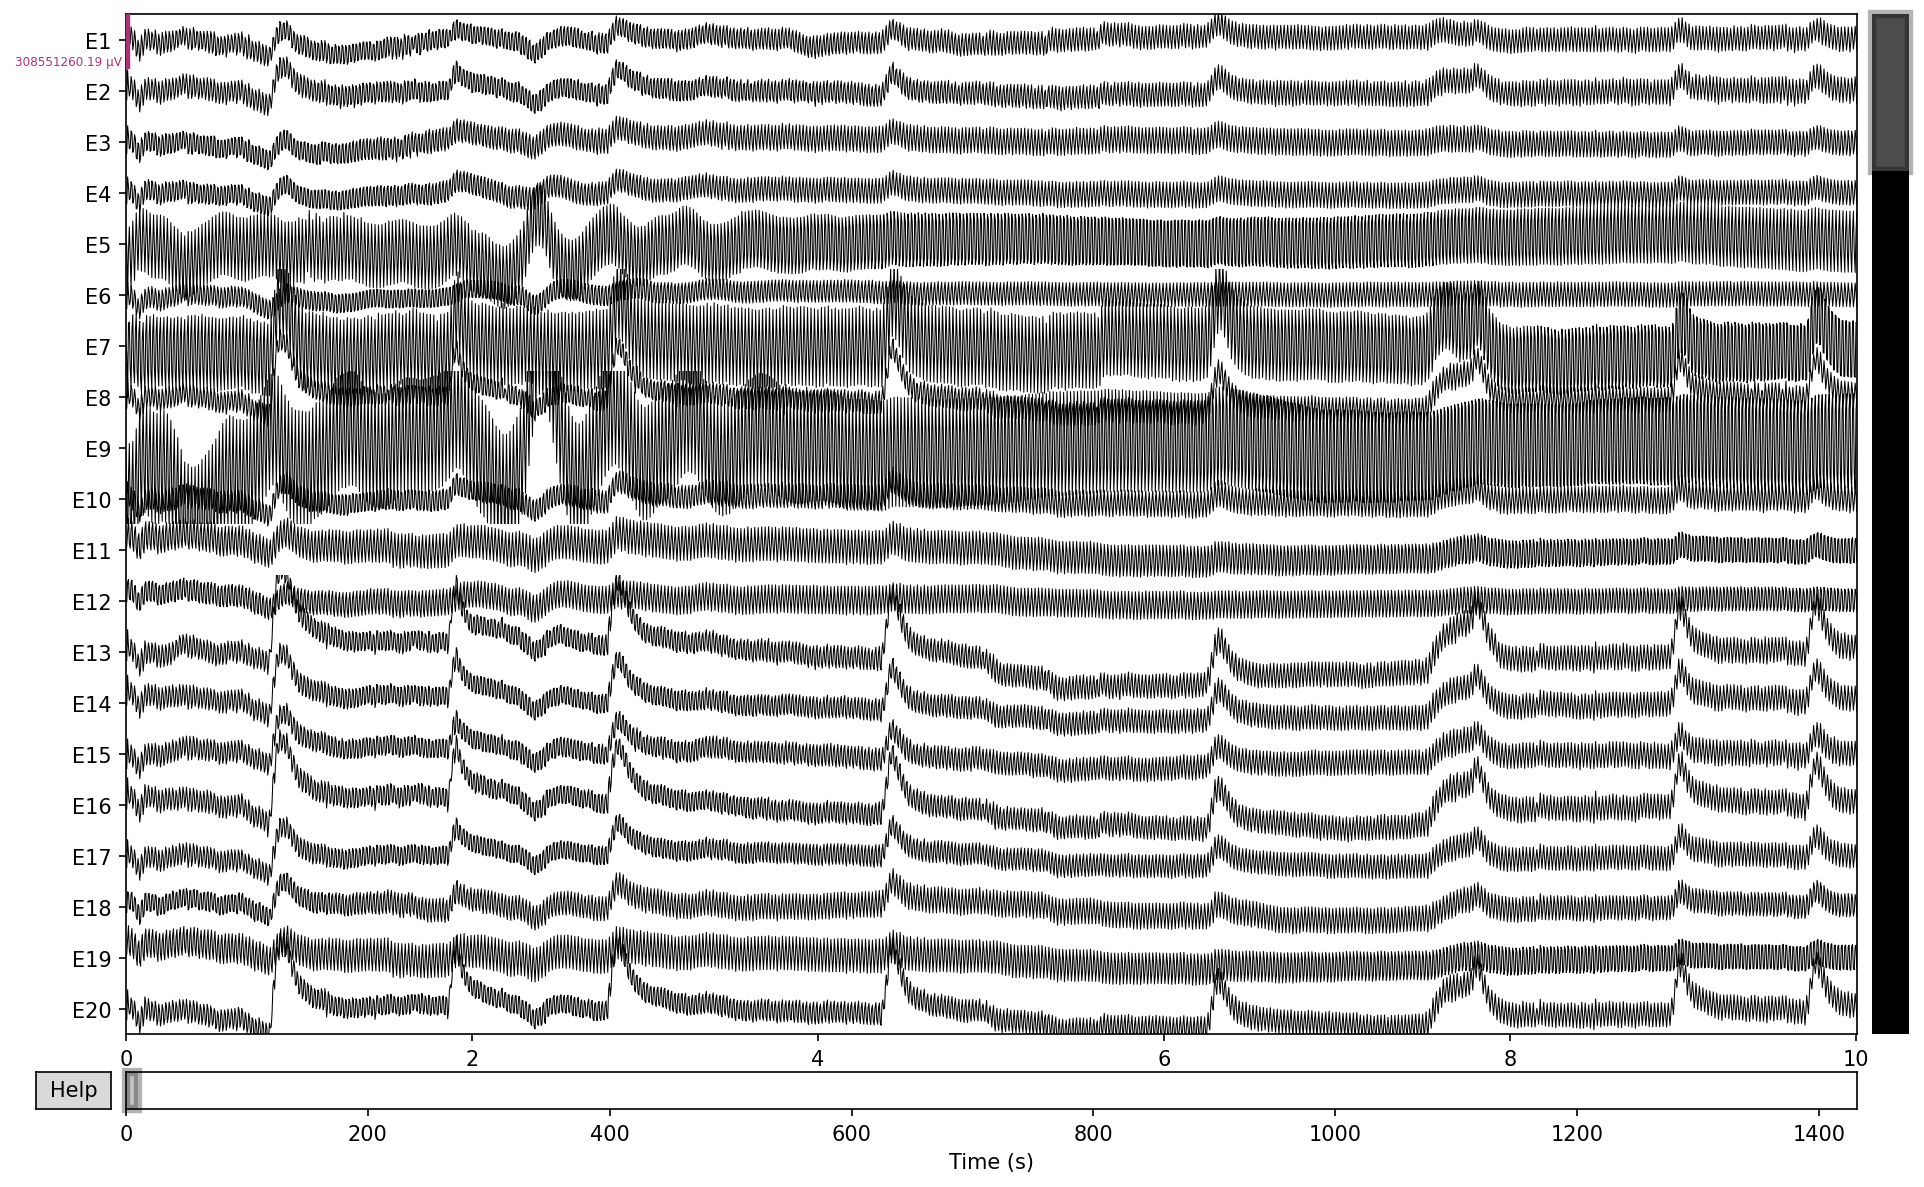

In [8]:
# https://reybahl.medium.com/eeg-signal-analysis-with-python-fdd8b4cbd306
%matplotlib qt
eeg_raw.plot(scalings='auto')


ref = 'average'
<!-- 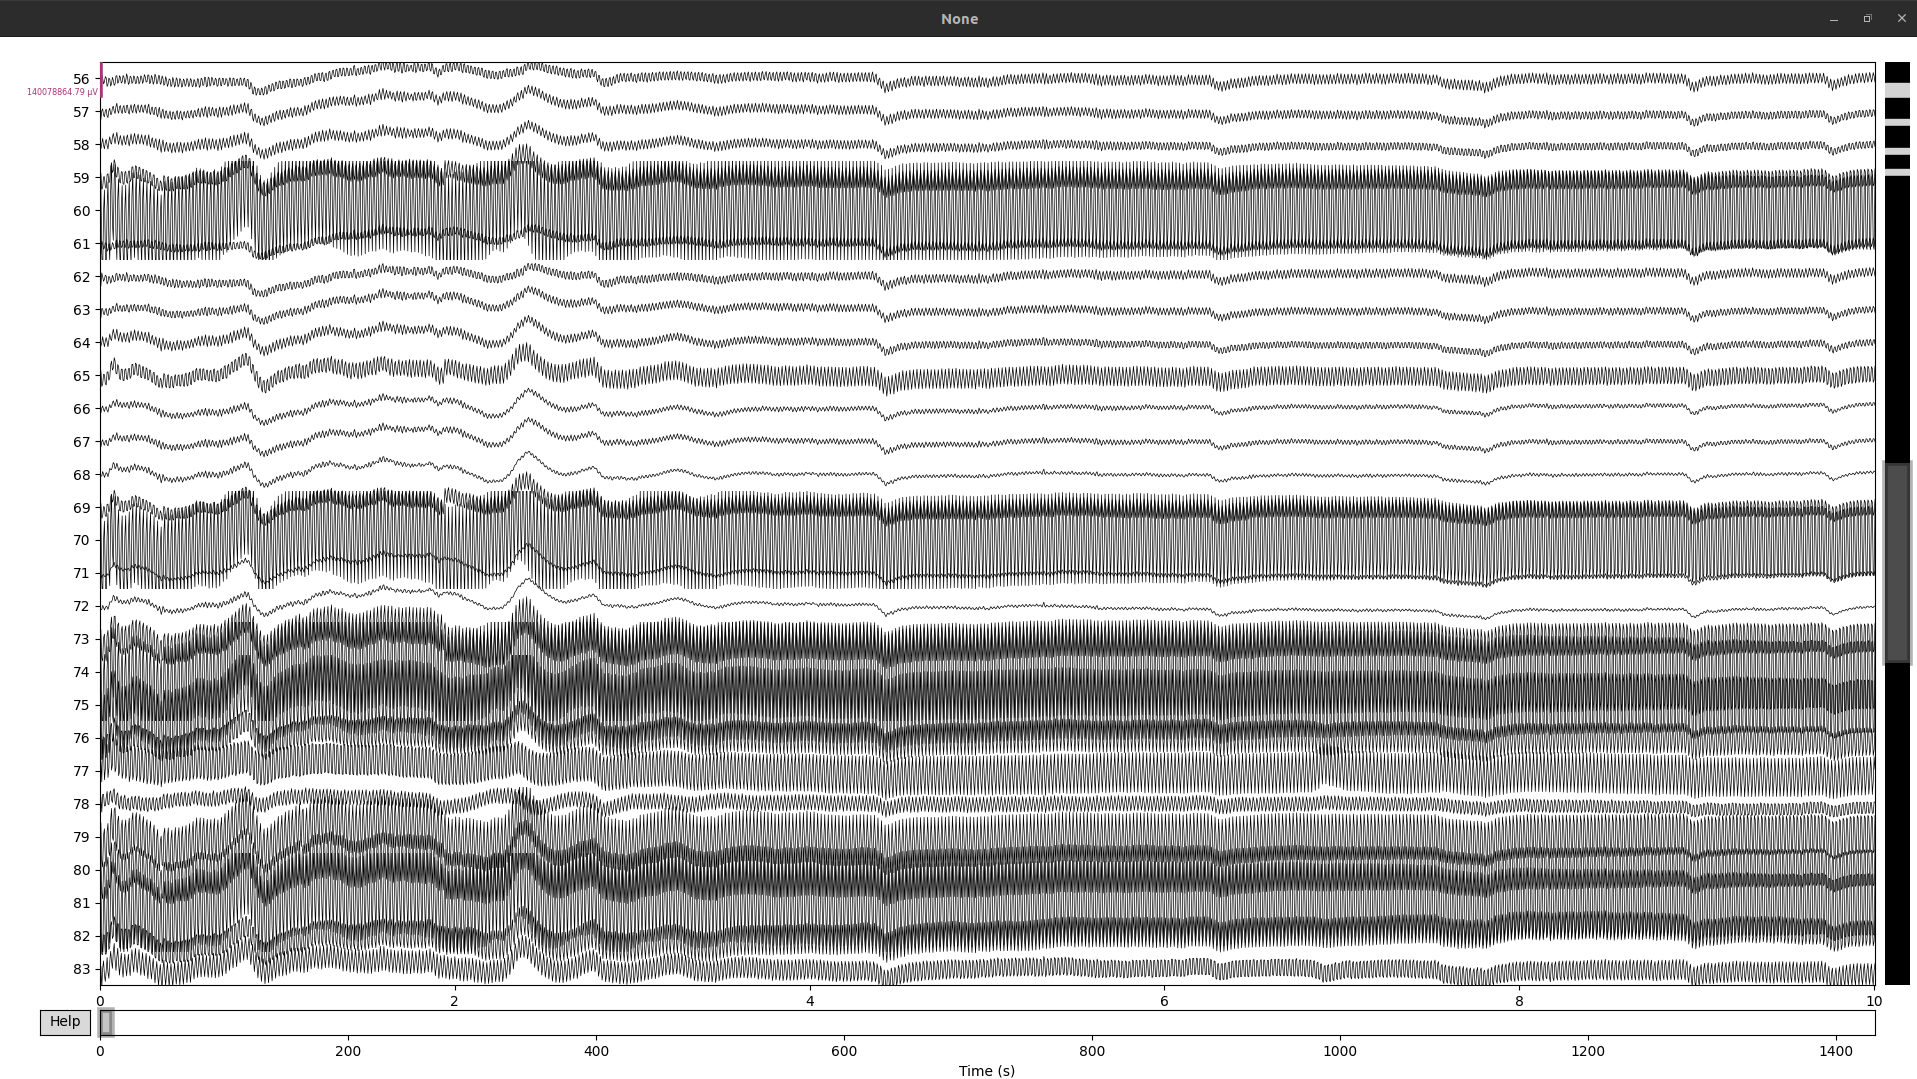 -->

<div>
<img src="img/ref_avg.png" width=800>
</div>

ref = channel 129
<!-- 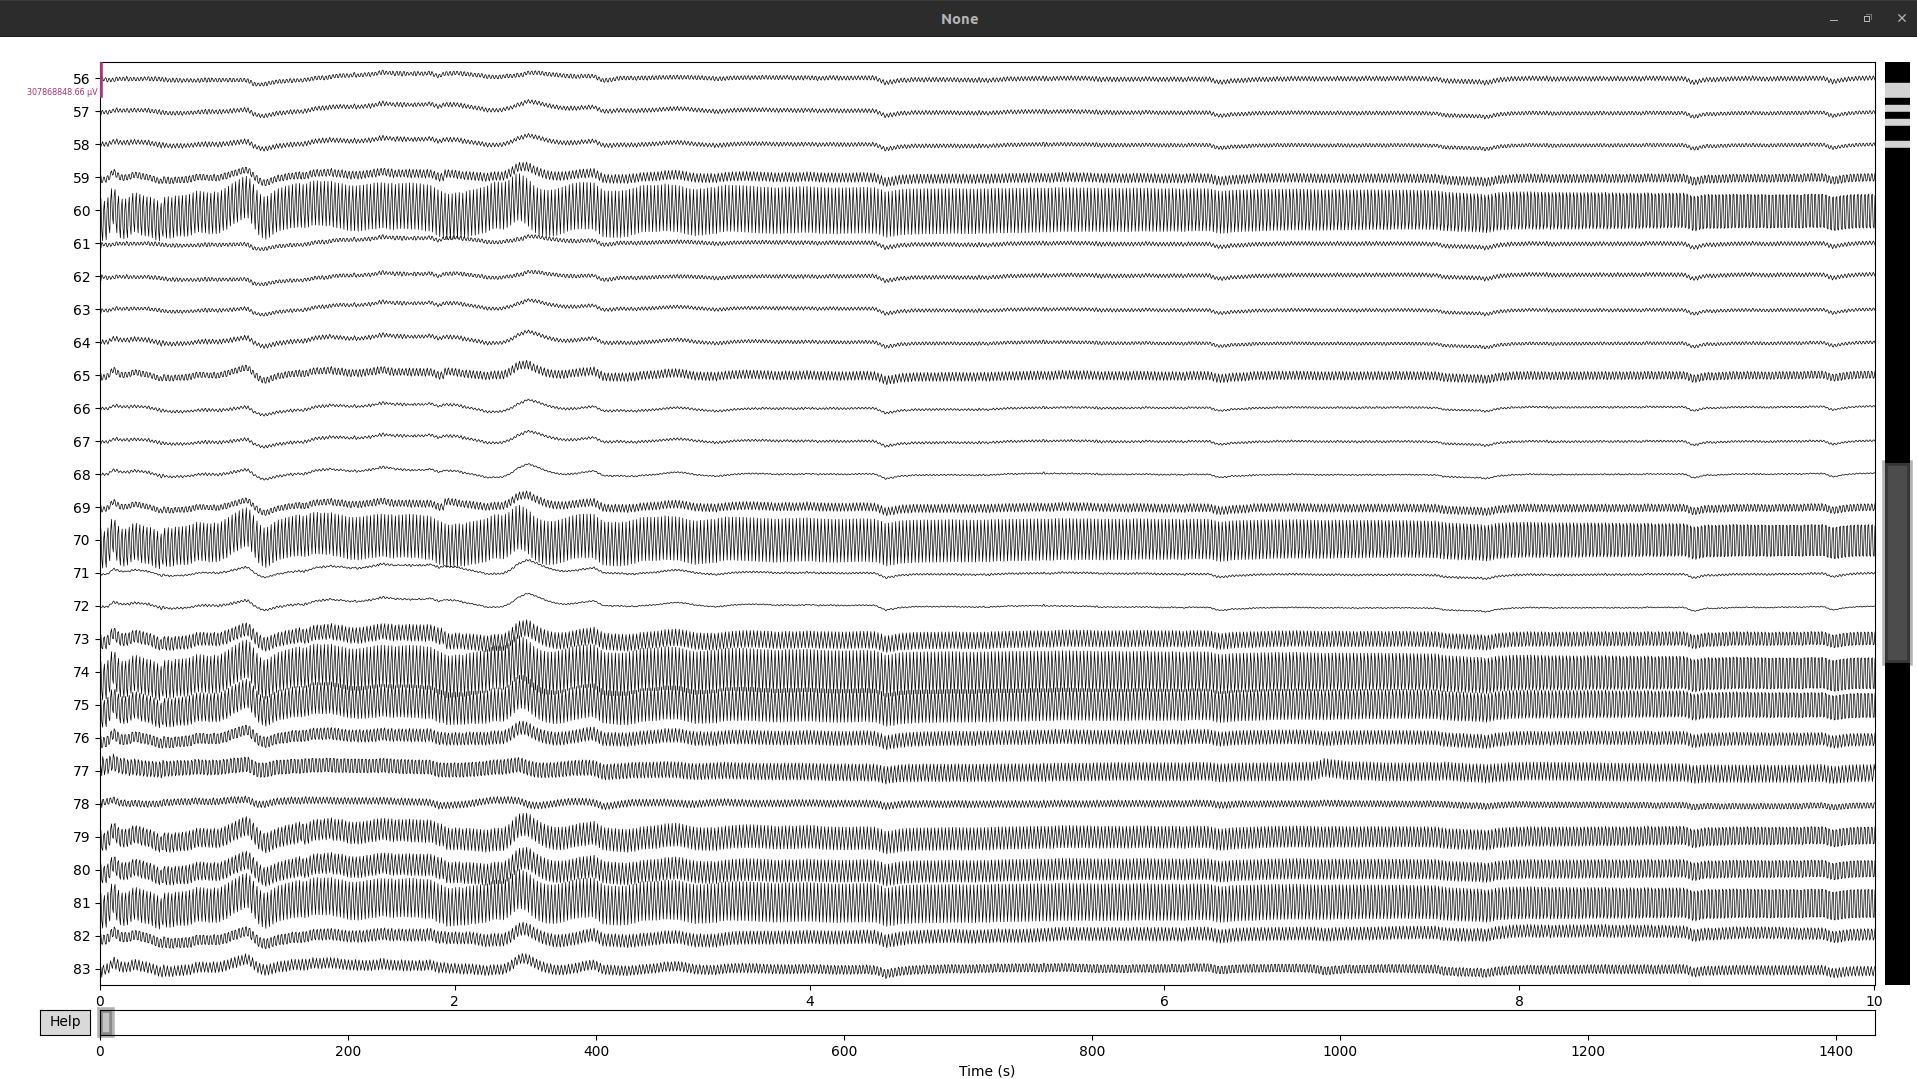 -->

<div>
<img src="img/ref_ch128.png" width=800>
</div>


# define epochs

In [9]:
# idxs = np.where(events_array == 1)
# print(f'epoch indexes: {idxs}')

# epochs = np.split(events_array, idxs[0]//resample_freq)

# print(f"epochs found: {len(epochs)}")

# epochs_mne = mne.EpochsArray(epochs, info)

Channels marked as bad:
[np.str_('E9')]


# into frequency domain

286231
<class 'numpy.ndarray'>
(1024,)
126.11211936659147
-177.07793553795597


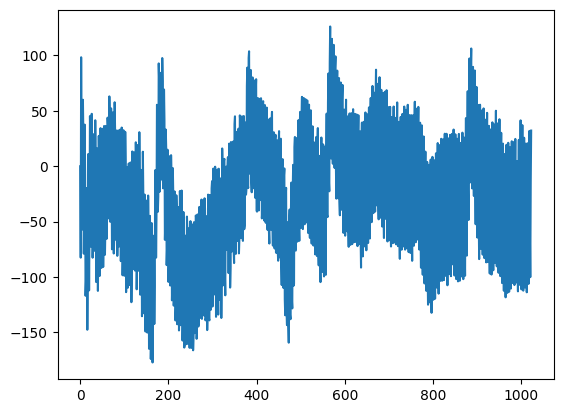

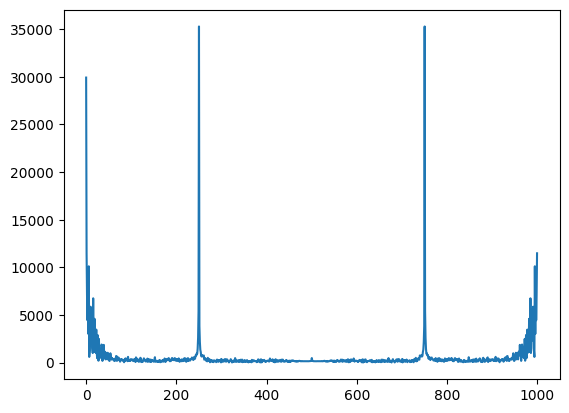

In [98]:
%matplotlib inline
import scipy.signal

print(len(eeg_raw[0][1]))
print(type(eeg_raw[0][1]))

sample_len = 2**10
sample = eeg_raw[0][0][0][0:sample_len]

print(sample.shape)
print(max(sample))
print(min(sample))

plt.plot(sample)

fft = scipy.fft.fft(sample)
freq_x = np.linspace(0, sampling_freq, sample_len)

fig, ax = plt.subplots()
ax.plot(freq_x, np.abs(fft))
# ax.plot(np.abs(fft))


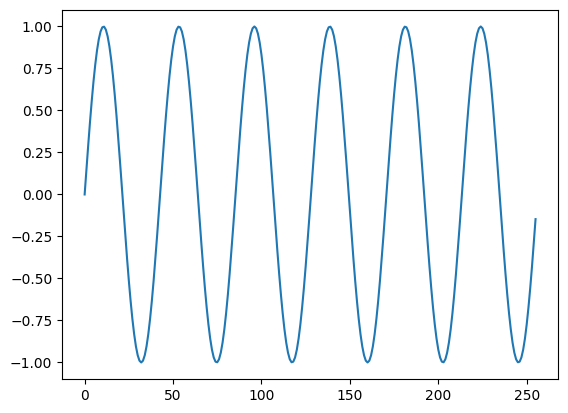

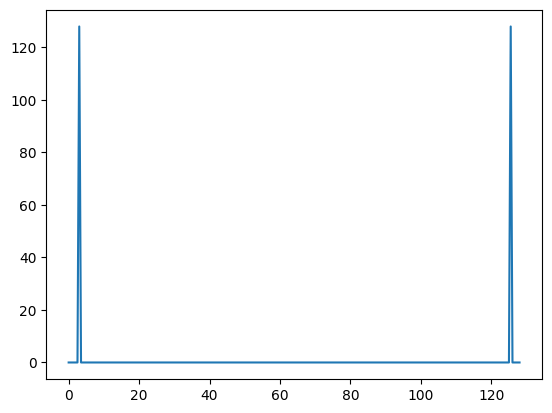